In [1]:
from ai_image_preprocessor import preprocess

def step(env, action, state):
    next_frame_1, reward_1, done_1, _ = env.step(action)
    next_frame_2, reward_2, done_2, _ = env.step(action)
    next_state = util.update_state_arr(state, preprocess(next_frame_1), preprocess(next_frame_2))
    return (next_state, int(reward_1 + reward_2), done_1 or done_2)

In [4]:
import ai_display as display
import ai_util as util
from ai_logger import Logger
import time

def train(env, agent, n_episodes=10000, model_name="model", save_interval=5, log_interval=1):
#     logger = Logger(10, "episode | frames | score | step time | ep time")
    
    for episode in range(n_episodes):
        
        frame = env.reset()
        state = util.create_state_arr(preprocess(frame))
        score = 0
        steps = 0
        start_time = time.time()
        for t in range(1000):
#             display.show_state(state[3], env.spec.id, t, score)
            env.render()
            action = agent.act(state)

            next_state, reward, done = step(env, action, state)
            
            agent.remember(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            
            
            steps += 1
            if done: 
                duration = time.time() - start_time
#                 logger.add("{:>7d} | {:>6d} | {:>5d} | {:>9.5f} | {:>7.5f}"
#                        .format(episode+1, t, score, duration/t, duration))
                break
        
        agent.replay(batch_size=32)
        if episode + 1 >= 2000:
            if agent.epsilon <= 0.6:
                if episode + 1 >= 5700:
                    if agent.epsilon <= 0.3:
                        agent.epsilon = 0.3
                    else:
                        agent.epsilon *= agent.epsilon_decay
                else:
                    agent.epsilon = 0.6

            else:
                agent.epsilon *= agent.epsilon_decay
            
#         if episode % log_interval == 0:
#             logger.log()
            
        if episode % save_interval == 0:
            agent.save_model(model_name)
            f= open("steps.txt","a+")
            f.write(str(steps)+'\n')
            f.close()
            f2 = open("episodes.txt", "w+")
            f2.write("{:>7d} | {:>6d} | {:>5d} | {:>9.5f} | {:>7.5f} | {}"
                          .format(episode + 1, t, score, duration / t, duration, agent.epsilon))
            f2.close()
        
    agent.save_model(model_name)


KeyboardInterrupt: 

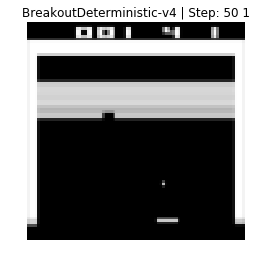

In [5]:
from ai_agent import Agent
import gym

env = gym.make("BreakoutDeterministic-v4")
n_actions = env.action_space.n
state_shape = (84, 84, 4)

try:
    f2 = open("episodes.txt", "r")
    lines = f2.readlines()
    values = lines[0].split(sep="|")
    start_episode = int(values[0].strip())
    epsilon = float(values[-1].strip())
    # f2.close()
except FileNotFoundError:
    start_episode = 0
    epsilon = 1.0

agent = Agent(state_shape, n_actions, epsilon=1.0)

model_name = "models/new-model.h5"
# agent.new_model()
agent.load_model(model_name) 
train(env, agent, model_name=model_name)

Last epsiode: 1285